# Retail Proyect: Product Detection & Identification for helping ensure Planogram Shelfs

## 1. Product Detection YOLO 10
- Use SKU-110K dataset to fine tune the YOLO model for detecting products
- Input: Shelf image -> Output: Shelf image with boundaries per product

In [ ]:
!nvidia-smi

Thu Feb 20 16:20:07 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   44C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.2/922.2 kB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 83.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 837.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 85.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninsta

In [1]:
#Download dataset
!gdown --id 1iq93lCdhaPUN0fWbLieMtzfB1850pKwd -O SKU110K_fixed.tar.gz
!tar -xvf SKU110K_fixed.tar.gz

Streaming output truncated to the last 5000 lines.
SKU110K_fixed/images/train_2529.jpg
SKU110K_fixed/images/test_1599.jpg
SKU110K_fixed/images/train_268.jpg
SKU110K_fixed/images/test_2667.jpg
SKU110K_fixed/images/val_510.jpg
SKU110K_fixed/images/val_5.jpg
SKU110K_fixed/images/train_2623.jpg
SKU110K_fixed/images/train_2118.jpg
SKU110K_fixed/images/test_1188.jpg
SKU110K_fixed/images/train_1523.jpg
SKU110K_fixed/images/test_2256.jpg
SKU110K_fixed/images/test_1661.jpg
SKU110K_fixed/images/train_330.jpg
SKU110K_fixed/images/test_789.jpg
SKU110K_fixed/images/train_1112.jpg
SKU110K_fixed/images/train_399.jpg
SKU110K_fixed/images/test_2798.jpg
SKU110K_fixed/images/test_1250.jpg
SKU110K_fixed/images/train_7892.jpg
SKU110K_fixed/images/test_378.jpg
SKU110K_fixed/images/train_7387.jpg
SKU110K_fixed/images/test_5.jpg
SKU110K_fixed/images/train_6381.jpg
SKU110K_fixed/images/test_851.jpg
SKU110K_fixed/images/test_1792.jpg
SKU110K_fixed/images/train_7481.jpg
SKU110K_fixed/images/train_4828.jpg
SKU110

### The yolo model is fine tuned with only 10 epochs which is lower to the 100 epochs recommended. However, the model still recognize very well the objects.

In [ ]:
#Import the model to custom training
from ultralytics import YOLO
# Load YOLOv10n model from scratch
model = YOLO("yolov10n.pt")
# Train the model
results = model.train(data="SKU-110K.yaml", epochs=10, imgsz=640, batch=8)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.59M/5.59M [00:00<00:00, 308MB/s]


Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov10n.pt, data=SKU-110K.yaml, epochs=10, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_w

100%|██████████| 11.4G/11.4G [12:05<00:00, 16.8MB/s]

Unzipping /content/datasets/SKU110K_fixed.tar.gz to /content/datasets...



Converting /content/datasets/SKU-110K/annotations_train.csv: 100%|██████████| 8219/8219 [04:02<00:00, 33.89it/s]
Converting /content/datasets/SKU-110K/annotations_val.csv: 100%|██████████| 588/588 [00:03<00:00, 174.09it/s]
Converting /content/datasets/SKU-110K/annotations_test.csv: 100%|██████████| 2936/2936 [00:33<00:00, 88.48it/s]

Dataset download success ✅ (1171.6s), saved to /content/datasets



100%|██████████| 755k/755k [00:00<00:00, 110MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1      9856  ultralytics.nn.modules.block.SCDown          [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1     36096  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 303MB/s]


AMP: checks passed ✅


train: Scanning /content/datasets/SKU-110K/labels... 8216 images, 0 backgrounds, 3 corrupt: 100%|██████████| 8219/8219 [01:35<00:00, 86.20it/s]

train: WARNING ⚠️ /content/datasets/SKU-110K/images/train_1025.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/datasets/SKU-110K/images/train_1046.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/datasets/SKU-110K/images/train_1051.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/datasets/SKU-110K/images/train_1097.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/datasets/SKU-110K/images/train_1107.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/datasets/SKU-110K/images/train_1134.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/datasets/SKU-110K/images/train_1158.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/datasets/SKU-110K/images/train_1168.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/datasets/SKU-110K/images/train_1176.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/datasets/SKU-110K/images/train_1178.jpg: corrupt JPEG restored and saved


train: New cache created: /content/datasets/SKU-110K/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/datasets/SKU-110K/labels... 588 images, 0 backgrounds, 0 corrupt: 100%|██████████| 588/588 [00:07<00:00, 76.56it/s]

val: WARNING ⚠️ /content/datasets/SKU-110K/images/val_0.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/datasets/SKU-110K/images/val_115.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/datasets/SKU-110K/images/val_127.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/datasets/SKU-110K/images/val_166.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/datasets/SKU-110K/images/val_172.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/datasets/SKU-110K/images/val_190.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/datasets/SKU-110K/images/val_2.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/datasets/SKU-110K/images/val_209.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/datasets/SKU-110K/images/val_214.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/datasets/SKU-110K/images/val_223.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/datasets/SKU-110K/images/val_

Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 95 weight(decay=0.0), 108 weight(decay=0.0005), 107 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10       4.9G      3.486      2.789       2.19       1335        640: 100%|██████████| 1027/1027 [08:21<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:29<00:00,  1.25it/s]


                   all        588      90968      0.695      0.613      0.679      0.389

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      4.62G      3.259      1.944        2.1       1174        640: 100%|██████████| 1027/1027 [08:15<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:27<00:00,  1.32it/s]


                   all        588      90968      0.761      0.678      0.757      0.449

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10       5.5G      3.195       1.81      2.078       1132        640: 100%|██████████| 1027/1027 [08:11<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:28<00:00,  1.31it/s]


                   all        588      90968      0.778       0.68      0.762      0.452

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      5.35G      3.141      1.719      2.057       1097        640: 100%|██████████| 1027/1027 [08:06<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:27<00:00,  1.36it/s]


                   all        588      90968       0.81      0.721      0.805      0.484

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      5.57G      3.091      1.648      2.039        948        640: 100%|██████████| 1027/1027 [08:03<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:27<00:00,  1.36it/s]


                   all        588      90968      0.817      0.736      0.815      0.491

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      4.63G      3.053      1.594      2.026       1089        640: 100%|██████████| 1027/1027 [08:08<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:28<00:00,  1.30it/s]


                   all        588      90968      0.831      0.745      0.827      0.505

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      5.91G      3.014      1.547      2.015        995        640: 100%|██████████| 1027/1027 [08:04<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:27<00:00,  1.35it/s]


                   all        588      90968      0.839      0.747      0.833      0.511

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      5.01G      2.985      1.508      2.005       1130        640: 100%|██████████| 1027/1027 [08:02<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:27<00:00,  1.33it/s]


                   all        588      90968      0.842      0.762      0.843      0.519

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      4.41G      2.957      1.476      1.992       1460        640: 100%|██████████| 1027/1027 [08:02<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:28<00:00,  1.28it/s]

                   all        588      90968      0.845      0.769      0.848      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      5.32G      2.934      1.447      1.983       1133        640: 100%|██████████| 1027/1027 [08:02<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:27<00:00,  1.33it/s]


                   all        588      90968      0.855      0.773      0.856      0.532

10 epochs completed in 1.450 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.7MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.7MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv10n summary (fused): 125 layers, 2,694,806 parameters, 0 gradients, 8.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:49<00:00,  1.35s/it]


                   all        588      90968      0.855      0.773      0.856      0.532
Speed: 0.3ms preprocess, 3.3ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs/detect/train



image 1/1 d:\MMA\3. Winter\Intro AI\Final Project\Retail Model\test_0.jpg: 640x480 141 objects, 129.2ms
Speed: 2.7ms preprocess, 129.2ms inference, 0.2ms postprocess per image at shape (1, 3, 640, 480)


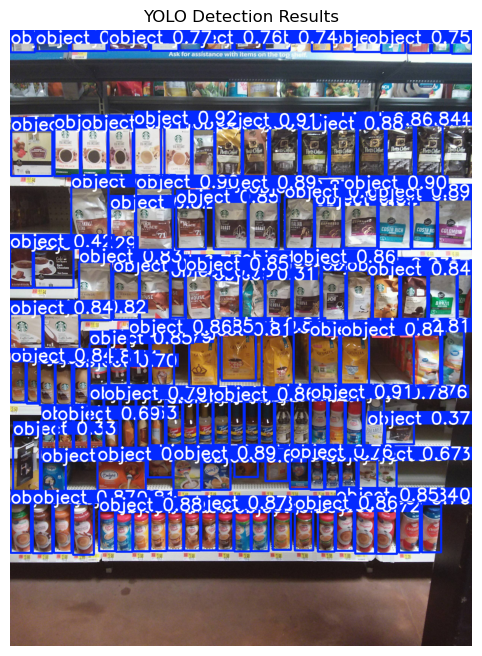

In [1]:
###Testing the best YOLO model for the product identification
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2

model = YOLO("best.pt")
test_image = "test_0.jpg"
results = model(test_image)
annotated_image = results[0].plot()
annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 8))
plt.imshow(annotated_image_rgb)
plt.title("YOLO Detection Results")
plt.axis("off")
plt.show()

In [2]:
output_path = "output_test_0.jpg"
results[0].save(output_path)

'output_test_0.jpg'

### Extract the cropped images from the YOLO fine tune model (object detection)

In [2]:
import cv2
import numpy as np
import math

def extract_objects(image_path, results, conf_threshold=0.5):
    """
    Extracts cropped objects from an image using YOLO detection results and
    applies CLIP-specific preprocessing for feature embedding extraction.
    
    Parameters:
        image_path (str): Path to the original image.
        results: YOLO detection results (list or similar object with .boxes.xyxy and .boxes.conf).
        conf_threshold (float): Minimum confidence threshold for a detection to be considered valid.
    
    Returns:
        clip_inputs (list): List of tensor objects ready for CLIP model input.
        bounding_boxes (list): List of bounding boxes (x1, y1, x2, y2) in integer pixel coordinates.
        original_crops (list): List of original crops before preprocessing (OpenCV BGR format).
    """
    
    # 1. Read the original image
    img = cv2.imread(image_path)
    if img is None:
        print("Error: Image not found!")
        return [], [], []
    
    original_crops = []
    bounding_boxes = []
    
    # 2. Convert YOLO outputs to NumPy arrays
    boxes = results[0].boxes.xyxy.cpu().numpy()
    confidences = results[0].boxes.conf.cpu().numpy() if results[0].boxes.conf is not None else None
    
    # 3. Image dimensions for boundary checks
    h, w = img.shape[:2]
    
    # 4. Loop over each detection
    for i, box in enumerate(boxes):
        # Skip if confidence is below threshold
        if confidences is not None and confidences[i] < conf_threshold:
            continue
        
        # Convert float coordinates to integers
        x1, y1, x2, y2 = box.astype(int)
        
        # Clamp coordinates to image boundaries to avoid errors
        x1, y1 = max(0, x1), max(0, y1)
        x2, y2 = min(w - 1, x2), min(h - 1, y2)
        
        # Check if the bounding box is valid (non-negative width/height)
        if x2 <= x1 or y2 <= y1:
            continue
        
        # Crop the detected object
        cropped = img[y1:y2, x1:x2]
        original_crops.append(cropped.copy())
        
        bounding_boxes.append((x1, y1, x2, y2))
    
    return bounding_boxes, original_crops

In [3]:
def show_cropped_objects_side_by_side(cropped_objects, max_per_row=10):
    n_objects = len(cropped_objects)
    if n_objects == 0:
        print("No objects to display.")
        return
    
    n_cols = min(max_per_row, n_objects)
    n_rows = math.ceil(n_objects / n_cols)
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 4 * n_rows))
    if isinstance(axes, np.ndarray):
        axes = axes.flatten()
    else:
        axes = [axes]
    
    for idx, crop in enumerate(cropped_objects):
        # For normalized images, we need to handle them differently
        if crop.dtype == np.float32 and np.max(crop) <= 1.0:
            # Scale back to 0-255 range and convert to uint8 for display
            display_img = (crop * 255).astype(np.uint8)
        else:
            display_img = crop
            
        rgb_image = cv2.cvtColor(display_img, cv2.COLOR_BGR2RGB)
        axes[idx].imshow(rgb_image)
        axes[idx].set_title(f"Detected Object {idx}")
        axes[idx].axis("off")
    
    # Hide any remaining empty subplots
    for idx in range(n_objects, len(axes)):
        axes[idx].axis("off")
    
    plt.tight_layout()
    plt.show()


image 1/1 d:\MMA\3. Winter\Intro AI\Final Project\Retail Model\test_0.jpg: 640x480 141 objects, 75.2ms
Speed: 3.9ms preprocess, 75.2ms inference, 0.2ms postprocess per image at shape (1, 3, 640, 480)


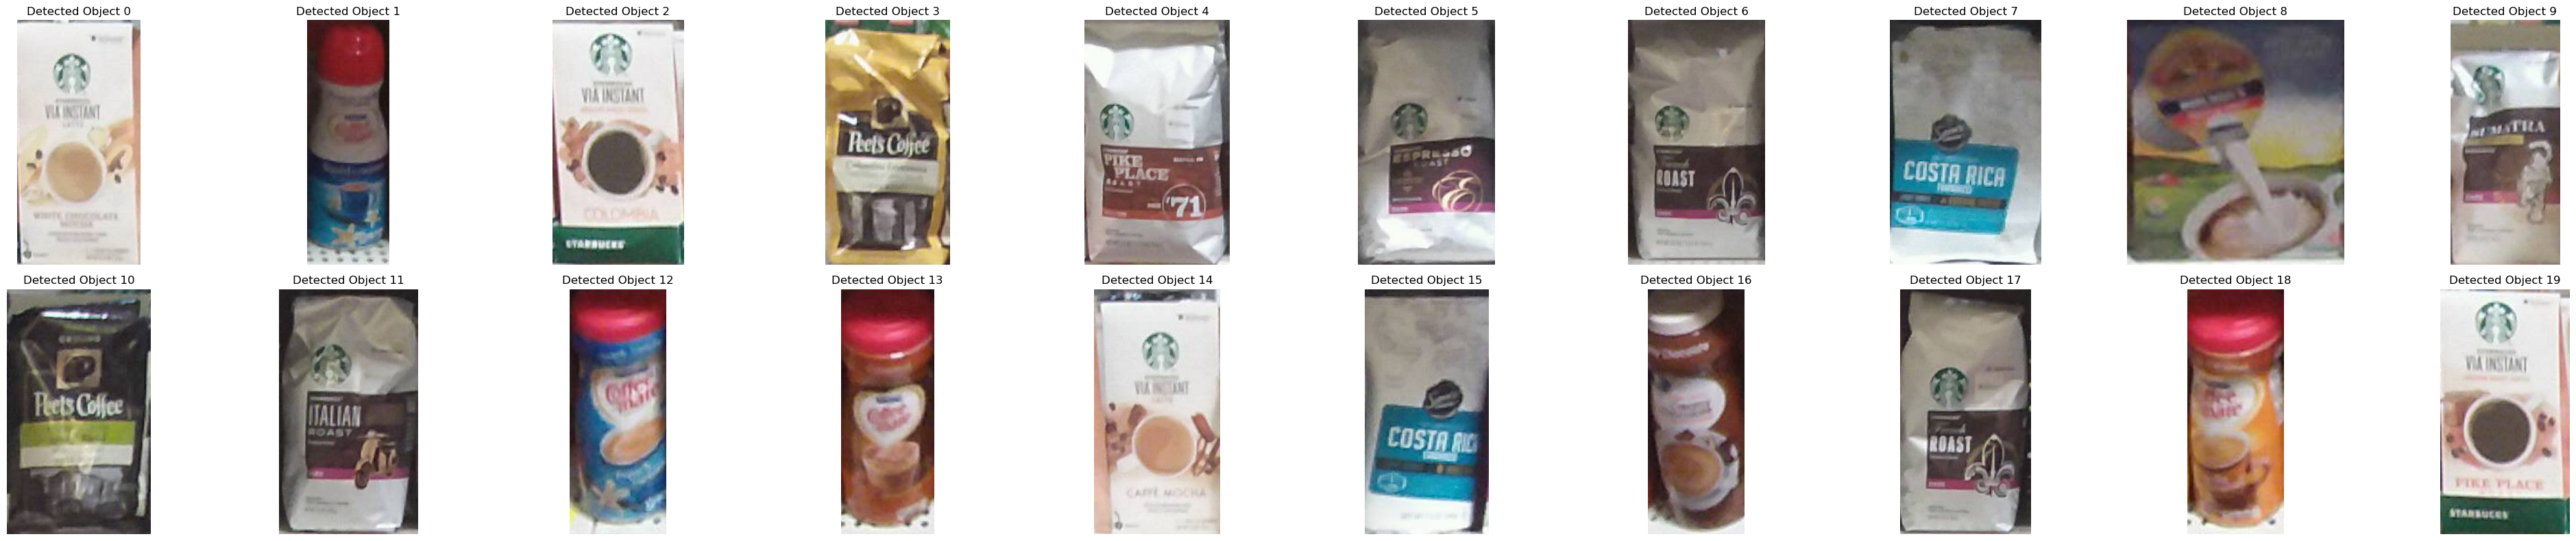

In [4]:
test_image = "test_0.jpg"
results = model(test_image)
bounding_boxes, original_crops = extract_objects(test_image, results, conf_threshold=0.5)
original_crops_20 = original_crops[:20]  # Slice the list to keep only 20
show_cropped_objects_side_by_side(original_crops_20, max_per_row=10)

## 2 Product Identification with Feature embedding and cluster them with cosine similarity
- Use CLIP, DINOv2 and ResNet-18 for obtaining the feature embedding of each image
- Weight Fusion of the features embeddings
- Clustering base on the embedding using cosine similarity

In [5]:
### Fature embeddings
import cv2
import torch
from PIL import Image
from transformers import CLIPProcessor, CLIPModel, AutoImageProcessor, Dinov2Model
from torchvision import models, transforms

device = "cuda" if torch.cuda.is_available() else "cpu"

# ===== Model & Processor Setup =====
# --- CLIP ---
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)
clip_model.eval()
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# --- DINOv2 ---
dino_processor = AutoImageProcessor.from_pretrained("facebook/dinov2-base")
dino_model = Dinov2Model.from_pretrained("facebook/dinov2-base").to(device)
dino_model.eval()

# --- ResNet-18 ---
resnet_model = models.resnet18(pretrained=True)
resnet_model.fc = torch.nn.Identity()  # Remove final classification layer
resnet_model = resnet_model.to(device)
resnet_model.eval()
resnet_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],  # ImageNet means
        std=[0.229, 0.224, 0.225]    # ImageNet stds
    )
])

# ===== Unified Processing & Extraction Functions =====
def process_original_crops(original_crops):
    """
    Process a list of original crops (in OpenCV BGR format) for each model.
    
    Parameters:
        original_crops (list): List of cropped images in BGR format.
        
    Returns:
        tuple: (clip_inputs, dinov2_inputs, resnet_inputs)
            - clip_inputs: List of processed tensors for CLIP.
            - dinov2_inputs: List of processed tensors for DINOv2.
            - resnet_inputs: List of processed tensors for ResNet.
    """
    clip_inputs = []
    dinov2_inputs = []
    resnet_inputs = []
    
    for crop in original_crops:
        # Convert from BGR (OpenCV) to RGB (PIL)
        crop_rgb = cv2.cvtColor(crop, cv2.COLOR_BGR2RGB)
        pil_img = Image.fromarray(crop_rgb)
        
        # Process for CLIP
        clip_inputs.append(clip_processor(images=pil_img, return_tensors="pt").pixel_values)
        # Process for DINOv2
        dinov2_inputs.append(dino_processor(images=pil_img, return_tensors="pt").pixel_values)
        # Process for ResNet-18
        resnet_inputs.append(resnet_transform(pil_img).unsqueeze(0))
        
    return clip_inputs, dinov2_inputs, resnet_inputs

def extract_feature_embeddings(clip_inputs, dinov2_inputs, resnet_inputs):
    """
    Extract feature embeddings using the specified models from processed image tensors.
    
    Parameters:
        clip_inputs (list): List of preprocessed image tensors for CLIP.
        dinov2_inputs (list): List of preprocessed image tensors for DINOv2.
        resnet_inputs (list): List of preprocessed image tensors for ResNet.
        
    Returns:
        tuple: (clip_embeddings, dinov2_embeddings, resnet_embeddings)
            - clip_embeddings: List of normalized feature embeddings from CLIP.
            - dinov2_embeddings: List of normalized feature embeddings from DINOv2.
            - resnet_embeddings: List of normalized feature embeddings from ResNet.
    """
    clip_embeddings = []
    dinov2_embeddings = []
    resnet_embeddings = []
    
    with torch.no_grad():
        # Process CLIP inputs
        for tensor in clip_inputs:
            tensor = tensor.to(device)
            vision_outputs = clip_model.vision_model(pixel_values=tensor)
            image_embeds = vision_outputs.pooler_output
            image_embeds = image_embeds / image_embeds.norm(dim=-1, keepdim=True)
            clip_embeddings.append(image_embeds.cpu())
        
        # Process DINOv2 inputs
        for tensor in dinov2_inputs:
            tensor = tensor.to(device)
            outputs = dino_model(pixel_values=tensor)
            if hasattr(outputs, "pooler_output") and outputs.pooler_output is not None:
                image_embeds = outputs.pooler_output
            else:
                image_embeds = outputs.last_hidden_state.mean(dim=1)
            image_embeds = image_embeds / image_embeds.norm(dim=-1, keepdim=True)
            dinov2_embeddings.append(image_embeds.cpu())
        
        # Process ResNet inputs
        for tensor in resnet_inputs:
            tensor = tensor.to(device)
            outputs = resnet_model(tensor)
            outputs = outputs / outputs.norm(dim=-1, keepdim=True)
            resnet_embeddings.append(outputs.cpu())
    
    return clip_embeddings, dinov2_embeddings, resnet_embeddings

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
c:\Users\gpnc_\anaconda4\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\gpnc_\anaconda4\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [22]:
### Function to get one feature embedding with the weight vector of those 3
def weighted_fusion_embeddings(clip_embeddings, dinov2_embeddings, resnet_embeddings, weights=[0.33, 0.33, 0.34]):
    fused_embeddings = []
    for clip_emb, dino_emb, resnet_emb in zip(clip_embeddings, dinov2_embeddings, resnet_embeddings):
        # Multiply each embedding by its corresponding weight
        weighted_clip   = weights[0] * clip_emb
        weighted_dino   = weights[1] * dino_emb
        weighted_resnet = weights[2] * resnet_emb
        
        # Concatenate the weighted embeddings along the feature dimension
        fused_emb = torch.cat([weighted_clip, weighted_dino, weighted_resnet], dim=-1)
        fused_embeddings.append(fused_emb)
    
    return fused_embeddings

In [23]:
clip_inputs, dinov2_inputs, resnet_inputs = process_original_crops(original_crops)
clip_embeddings, dinov2_embeddings, resnet_embeddings = extract_feature_embeddings(clip_inputs, dinov2_inputs, resnet_inputs)
fused_embedding=weighted_fusion_embeddings(clip_embeddings, dinov2_embeddings, resnet_embeddings)

### Cosine Similarity

In [24]:
def cosine_similarity_matrix(embeddings):
    normed = embeddings / embeddings.norm(dim=1, keepdim=True)
    similarity_matrix=torch.mm(normed, normed.t())
    return similarity_matrix

In [25]:
#Generate the similarity matrix with fused_embedding
embeddings_tensor = torch.cat(fused_embedding, dim=0)
similarity_matrix = cosine_similarity_matrix(embeddings_tensor)

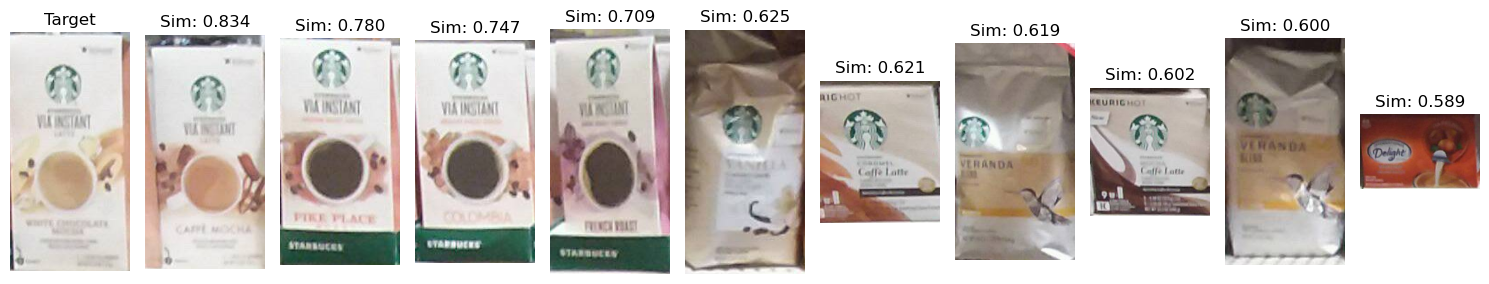

In [26]:
# Example: Find similar products to the first object
target_idx = 0
similar_indices = np.argsort(-similarity_matrix[target_idx])[1:11]  # Top 5 matches
num_similar = len(similar_indices)
plt.figure(figsize=(15, 5))

plt.subplot(1, num_similar + 1, 1)
plt.imshow(cv2.cvtColor(original_crops[target_idx], cv2.COLOR_BGR2RGB))
plt.title("Target")
plt.axis("off")
    
for i, idx in enumerate(similar_indices, start=2):
    plt.subplot(1, num_similar + 1, i)
    plt.imshow(cv2.cvtColor(original_crops[idx], cv2.COLOR_BGR2RGB))
    plt.title(f"Sim: {similarity_matrix[target_idx][idx]:.3f}")
    plt.axis("off")

plt.tight_layout()
plt.show()

### HDBSCAN Clustering

In [27]:
import numpy as np
import hdbscan
import torch

def group_similar_embeddings_hdbscan(similarity_matrix, min_cluster_size =2, min_samples= 2):
    """
    Clusters similar embeddings using HDBSCAN with cosine distance.

    :param similarity_matrix: NxN PyTorch tensor of cosine similarities.
    :param min_cluster_size: Minimum cluster size for HDBSCAN.
    :param min_samples: Minimum number of samples per cluster.
    :return: List of clusters (each cluster is a list of indices).
    """
    # Convert PyTorch tensor to NumPy and ensure dtype is float64
    similarity_matrix = similarity_matrix.cpu().numpy().astype(np.float64) if isinstance(similarity_matrix, torch.Tensor) else similarity_matrix.astype(np.float64)

    # Convert similarity matrix to distance matrix
    distance_matrix = 1 - similarity_matrix  # Convert similarity to distance
    distance_matrix = np.clip(distance_matrix, 0, None)  # Ensure no negative distances

    # Apply HDBSCAN clustering
    clusterer = hdbscan.HDBSCAN(
        min_cluster_size=min_cluster_size,
        min_samples=min_samples,
        metric="precomputed",  # Use precomputed distance matrix
        cluster_selection_method="eom"  # Best for variable-density clustering
    )

    labels = clusterer.fit_predict(distance_matrix)

    # Organize clusters
    clusters = {}
    for idx, label in enumerate(labels):
        if label == -1:
            continue  # Skip noise points
        clusters.setdefault(label, []).append(idx)

    return list(clusters.values())

In [43]:
clusters= group_similar_embeddings_hdbscan(similarity_matrix)

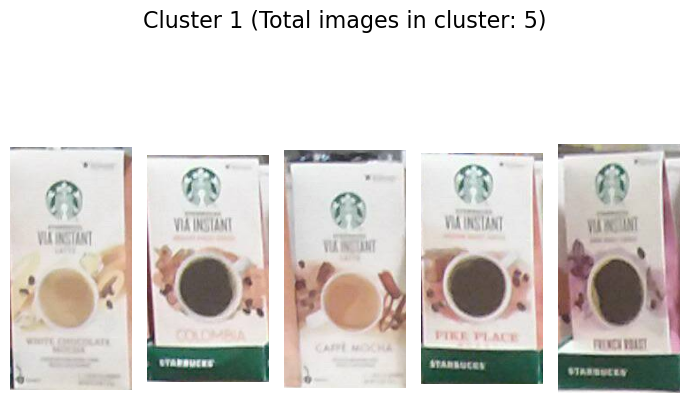

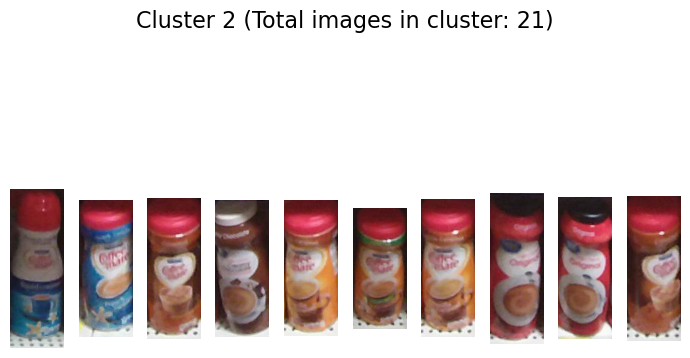

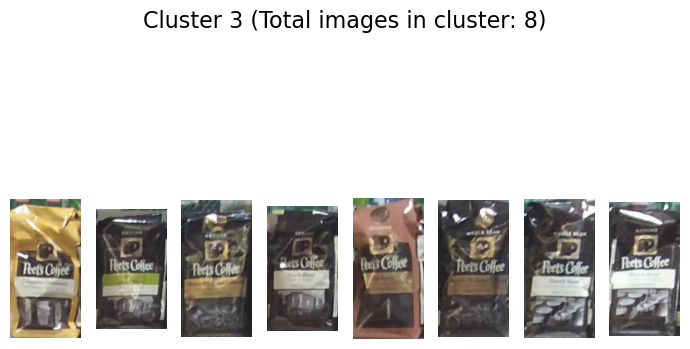

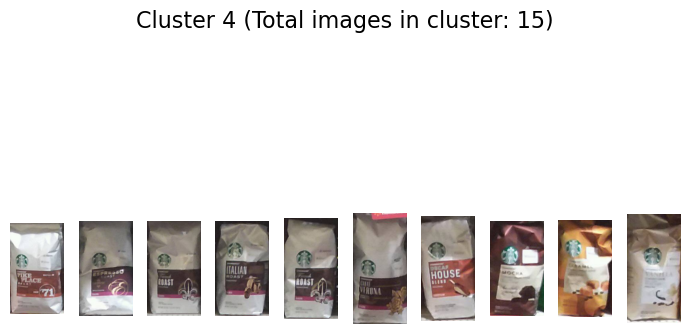

In [29]:
# Print the first 4 clusters (if available)
num_clusters_to_show = min(4, len(clusters))
for cluster_idx in range(num_clusters_to_show):
    cluster = clusters[cluster_idx]
    images_to_show = cluster[:10]  # Limit to 10 images per cluster
    num_images = len(images_to_show)
    
    plt.figure(figsize=(7, 5))
    for i, idx in enumerate(images_to_show):
        plt.subplot(1, num_images, i + 1)
        # Convert from BGR (OpenCV) to RGB for correct color display
        plt.imshow(cv2.cvtColor(original_crops[idx], cv2.COLOR_BGR2RGB))
        plt.axis("off")
    plt.suptitle(f"Cluster {cluster_idx + 1} (Total images in cluster: {len(cluster)})", fontsize=16)
    plt.tight_layout()
    plt.show()

# 3. Planogram images according to products cluster

In [30]:
def show_clusters_on_image(image_path, bounding_boxes, clusters, line_thickness=6):
    """
    Display the original image with bounding boxes drawn for each object.
    Each cluster's boxes are drawn in a distinct color with thicker boundaries.
    
    Parameters:
    - image_path: str, path to the original image.
    - bounding_boxes: list of tuples, each tuple is (x_min, y_min, x_max, y_max).
    - clusters: list of lists, where each sublist contains indices of bounding_boxes belonging to that cluster.
    - line_thickness: int, thickness of the rectangle boundary lines (default is 4).
    """
    # Load image using OpenCV
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Unable to load image.")
        return

    # Generate a colormap with distinct colors for each cluster using matplotlib's tab10
    cmap = plt.cm.get_cmap("tab10", len(clusters))
    
    # Draw bounding boxes for each cluster with thicker boundaries
    for cluster_idx, cluster in enumerate(clusters):
        # Get a color from the colormap (convert from RGBA in 0-1 range to BGR in 0-255)
        rgba_color = cmap(cluster_idx)  # returns (r, g, b, a)
        rgb_color = tuple(int(255 * x) for x in rgba_color[:3])
        bgr_color = (rgb_color[2], rgb_color[1], rgb_color[0])  # OpenCV uses BGR order

        for bbox_idx in cluster:
            x_min, y_min, x_max, y_max = bounding_boxes[bbox_idx]
            cv2.rectangle(image, (x_min, y_min), (x_max, y_max), bgr_color, thickness=line_thickness)

    # Convert image from BGR to RGB for display with matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    plt.axis("off")
    plt.show()

C:\Users\gpnc_\AppData\Local\Temp\ipykernel_15148\3500273844.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab10", len(clusters))


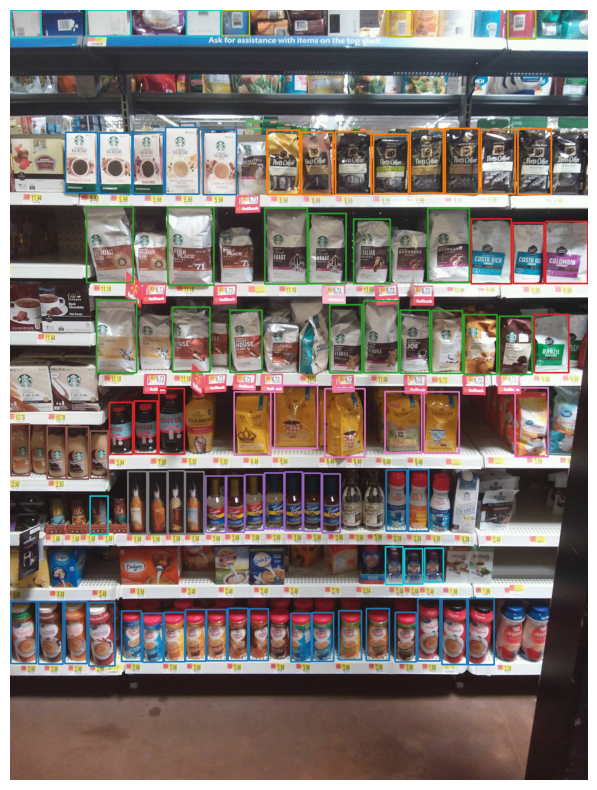

In [31]:
show_clusters_on_image(test_image, bounding_boxes, clusters)

# 4. Model for new images

In [45]:
##CLIP, DINOv2, ResNet-18

def run_pipeline(image_path, conf_threshold=0.5, fusion_weights=[0.33, 0.33, 0.34], min_cluster_size=2, min_samples=2):

    results = model(image_path)
    #Process the image
    bounding_boxes, original_crops = extract_objects(image_path, results, conf_threshold=conf_threshold)
    clip_inputs, dinov2_inputs, resnet_inputs= process_original_crops(original_crops)
    clip_embeddings, dinov2_embeddings, resnet_embeddings = extract_feature_embeddings(clip_inputs, dinov2_inputs, resnet_inputs)
    fused_embeddings = weighted_fusion_embeddings(clip_embeddings, dinov2_embeddings, resnet_embeddings, weights=fusion_weights)
    embeddings_tensor = torch.cat(fused_embeddings, dim=0)
    similarity_matrix = cosine_similarity_matrix(embeddings_tensor)
    clusters = group_similar_embeddings_hdbscan(similarity_matrix, min_cluster_size=min_cluster_size, min_samples=min_samples)
    show_clusters_on_image(image_path, bounding_boxes, clusters)

### Test 1: The image recognize certain patters to determinate the similarity of products, however the feature embedding need to be fine tuning for recognition of products


image 1/1 d:\MMA\3. Winter\Intro AI\Final Project\Retail Model\test_1.jpg: 640x480 149 objects, 129.3ms
Speed: 4.3ms preprocess, 129.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


C:\Users\gpnc_\AppData\Local\Temp\ipykernel_15148\3500273844.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab10", len(clusters))


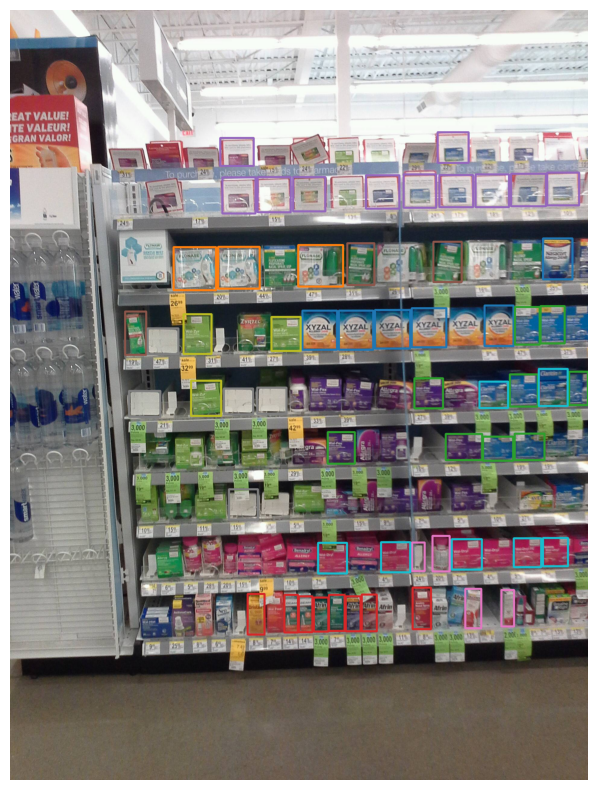

In [46]:
image_path = "test_1.jpg"
run_pipeline(image_path, conf_threshold=0.5, fusion_weights=[0.3, 0.35, 0.35], min_cluster_size=2, min_samples=2)

### Test 2: When the image is not too complicated with many details in the product and with high quality, the model can identify better. This indicates the feature embedding doesnt capture the complexity of products in real life, need to capture more complexity with fine tune models


image 1/1 d:\MMA\3. Winter\Intro AI\Final Project\Retail Model\outside_test.jpg: 416x640 121 objects, 103.0ms
Speed: 2.6ms preprocess, 103.0ms inference, 0.8ms postprocess per image at shape (1, 3, 416, 640)


C:\Users\gpnc_\AppData\Local\Temp\ipykernel_15148\3500273844.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab10", len(clusters))


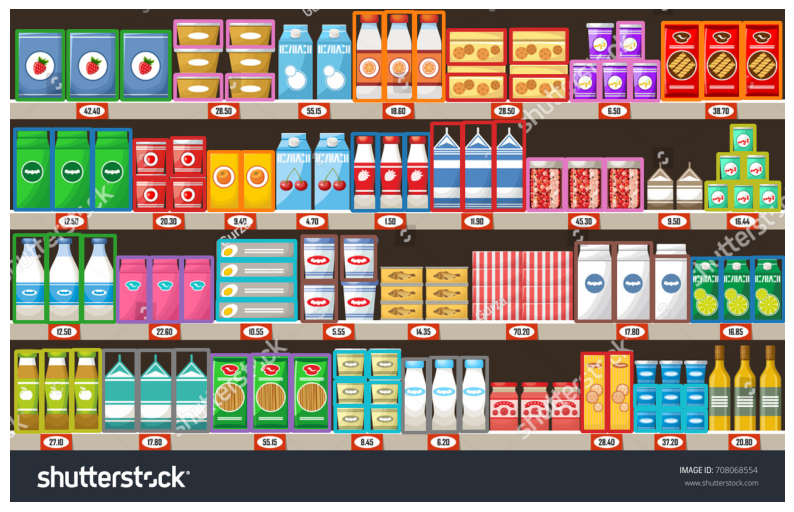

In [47]:
image_path = "outside_test.jpg"
run_pipeline(image_path, conf_threshold=0.5, fusion_weights=[0.3, 0.35, 0.35], min_cluster_size=2, min_samples=2)

### Test 3: In a very well organize shelf and with more quality of the picture, the model can identify better the same products


image 1/1 d:\MMA\3. Winter\Intro AI\Final Project\Retail Model\outside_test_1.jpg: 416x640 80 objects, 123.9ms
Speed: 3.6ms preprocess, 123.9ms inference, 0.2ms postprocess per image at shape (1, 3, 416, 640)


C:\Users\gpnc_\AppData\Local\Temp\ipykernel_15148\3500273844.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab10", len(clusters))


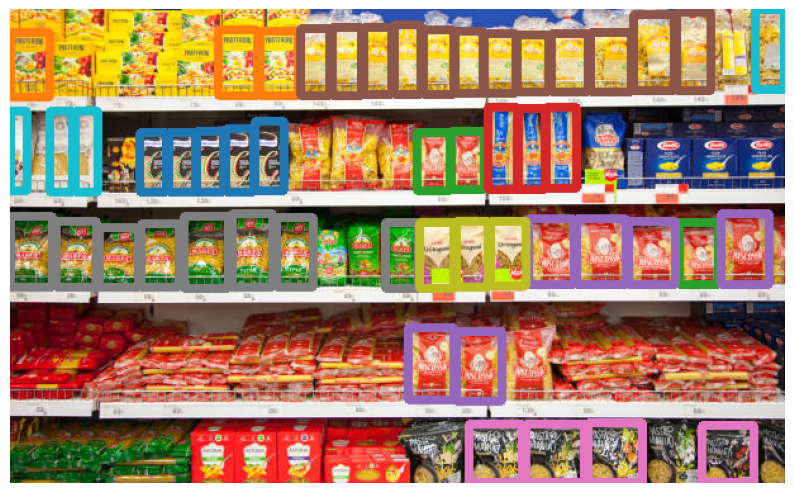

In [50]:
image_path = "outside_test_1.jpg"
run_pipeline(image_path, conf_threshold=0.5, fusion_weights=[0.4, 0.2, 0.4], min_cluster_size=2, min_samples=2)

### Test 4: As before, when the picture has more definition of image. The model can recognize the same products better


image 1/1 d:\MMA\3. Winter\Intro AI\Final Project\Retail Model\outside_test_2.jpg: 480x640 96 objects, 130.2ms
Speed: 7.3ms preprocess, 130.2ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)


C:\Users\gpnc_\AppData\Local\Temp\ipykernel_15148\3500273844.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab10", len(clusters))


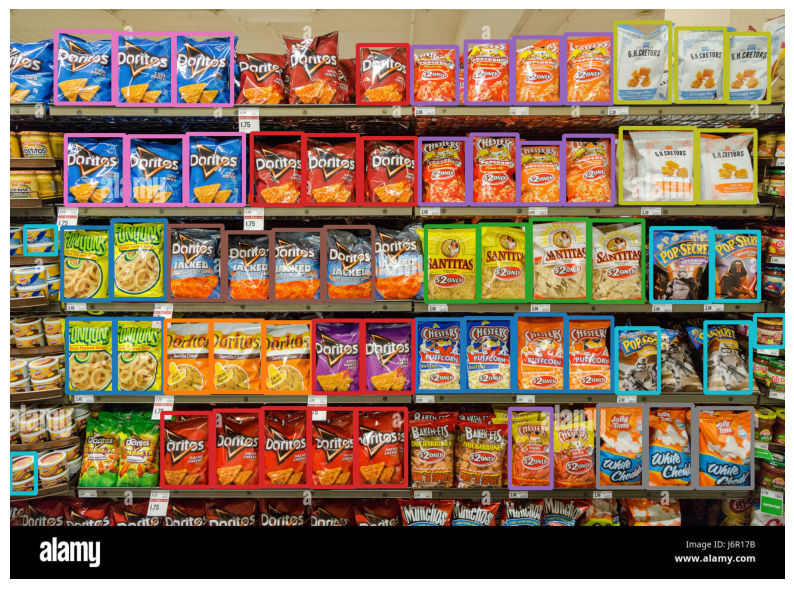

In [51]:
image_path = "outside_test_2.jpg"
run_pipeline(image_path, conf_threshold=0.5, fusion_weights=[0.4, 0.2, 0.4], min_cluster_size=2, min_samples=2)